### Myworkshop Fruit 3 class

In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [57]:
df = pd.read_csv('data/fruit3class.csv')
df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0
5,8.0,3.1,0
6,8.2,4.4,1
7,7.0,4.8,1
8,7.5,3.8,1
9,7.4,5.1,1


### Data Visualization

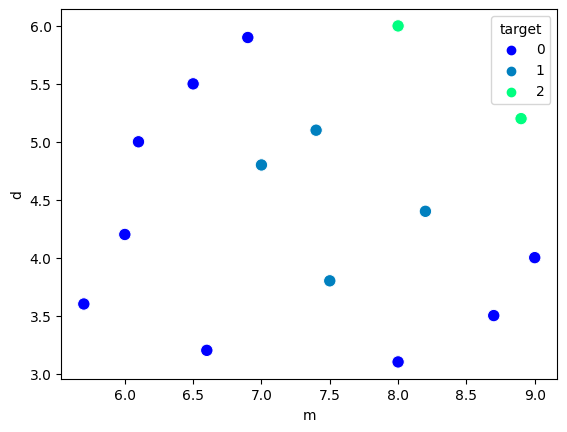

In [58]:
sns.scatterplot(x='m', y='d', data=df ,hue='target' , palette='winter', s=80)
plt.show()

In [59]:
#เตรียม X และ y
X = df.drop(['target'], axis=1)
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [60]:
y = df.target
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    2
11    2
12    0
13    0
14    0
Name: target, dtype: int64

### Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-1.31291621, -0.31157784],
       [-1.60111733, -0.96371751],
       [-0.83258101,  1.10139144],
       [-0.73651397, -1.39847729],
       [-0.44831285,  1.53615122]])

In [62]:
X_train = X_sc
y_train = y

### Model

In [63]:
from sklearn.neural_network import MLPClassifier

hidden = 200
iter = 200
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, verbose=True, random_state=1 )

In [64]:
model.fit(X_train, y)

Iteration 1, loss = 1.08208837
Iteration 2, loss = 1.06548237
Iteration 3, loss = 1.04929065
Iteration 4, loss = 1.03355054
Iteration 5, loss = 1.01824018
Iteration 6, loss = 1.00337316
Iteration 7, loss = 0.98890853
Iteration 8, loss = 0.97486354
Iteration 9, loss = 0.96122568
Iteration 10, loss = 0.94794918
Iteration 11, loss = 0.93502334
Iteration 12, loss = 0.92248168
Iteration 13, loss = 0.91029138
Iteration 14, loss = 0.89840088
Iteration 15, loss = 0.88681357
Iteration 16, loss = 0.87553710
Iteration 17, loss = 0.86460509
Iteration 18, loss = 0.85393049
Iteration 19, loss = 0.84353140
Iteration 20, loss = 0.83339430
Iteration 21, loss = 0.82350501
Iteration 22, loss = 0.81383382
Iteration 23, loss = 0.80439336
Iteration 24, loss = 0.79516685
Iteration 25, loss = 0.78616241
Iteration 26, loss = 0.77734104
Iteration 27, loss = 0.76871193
Iteration 28, loss = 0.76027051
Iteration 29, loss = 0.75199880
Iteration 30, loss = 0.74387749
Iteration 31, loss = 0.73591436
Iteration 32, los

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=200, random_state=1, verbose=True)

In [65]:
print(f"score : ", model.score(X_train, y_train))
print(f"actual : ", np.array(y))
print(f"predict : ", model.predict(X_train))

score :  1.0
actual :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
predict :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


In [66]:
class_name = ['Grape', 'Orange', 'Lemon']

In [67]:
y_predict = model.predict(X_train)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0], dtype=int64)

In [68]:
for i, y in enumerate(y_predict):
    print(f"Result{i} : ", class_name[y])

Result0 :  Grape
Result1 :  Grape
Result2 :  Grape
Result3 :  Grape
Result4 :  Grape
Result5 :  Grape
Result6 :  Orange
Result7 :  Orange
Result8 :  Orange
Result9 :  Orange
Result10 :  Lemon
Result11 :  Lemon
Result12 :  Grape
Result13 :  Grape
Result14 :  Grape


### ลองใส่ค่า Input ใหม่ลงไป
    -ต้องมีการใช้ scaler ก่อนหน้าในการปรับ input เข้า model ก่อน

In [75]:
X_input = [[6.4, 5.5],
           [8, 4.9]]
X_input = np.array(X_input)
X_input

array([[6.4, 5.5],
       [8. , 4.9]])

In [76]:
X_input_sc = sc.transform(X_input)
X_input_sc

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.92864805,  1.10139144],
       [ 0.60842459,  0.44925177]])

In [77]:
print(f"Predict : ", model.predict(X_input_sc))

Predict :  [0 1]


### Evaluation

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
class_name = ['Grape', 'Orange', 'Lemon']

print(classification_report(y_train, y_predict, target_names=class_name))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00         9
      Orange       1.00      1.00      1.00         4
       Lemon       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0 0]
 [0 4 0]
 [0 0 2]]


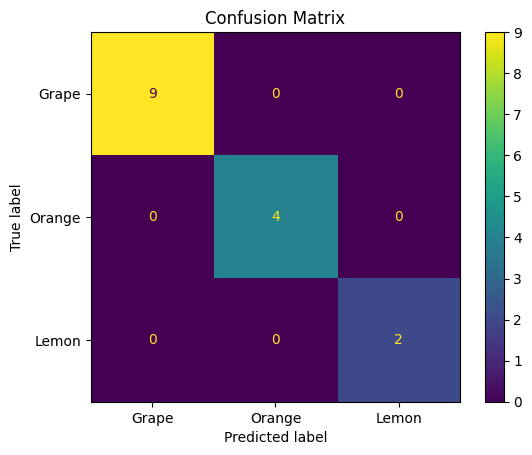

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title('Confusion Matrix')
plt.show()

### Decision Region

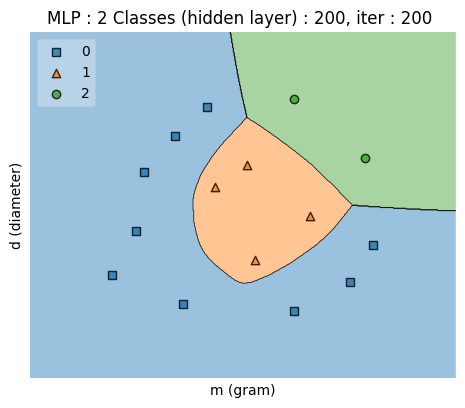

In [91]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(5.5,4.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP : 2 Classes (hidden layer) : {}, iter : {} '.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

### Loss Curve

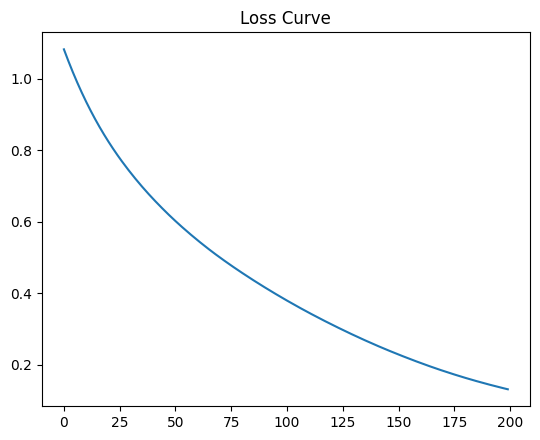

In [95]:
plt.figure(figsize=(5.5,4.5))
plt.title('Loss Curve')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()